# 상주인구 데이터 전처리

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc

In [2]:
# 데이터 로드
df = pd.read_csv("./data/상주인구_자치구.csv")

FileNotFoundError: [Errno 2] No such file or directory: './data/상주인구_자치구.csv'

In [ ]:
df.head()

,기준_년분기_코드,자치구_코드,자치구_코드_명,총_상주인구_수,남성_상주인구_수,여성_상주인구_수,연령대_10_미만_상주인구_수,연령대_20_상주인구_수,연령대_30_상주인구_수,연령대_40_상주인구_수,...,남성연령대_60_이상_상주인구_수,여성연령대_10_상주인구_수,여성연령대_20_상주인구_수,여성연령대_30_상주인구_수,여성연령대_40_상주인구_수,여성연령대_50_상주인구_수,여성연령대_60_이상_상주인구_수,총_가구_수,아파트_가구_수,비_아파트_가구_수
0,20241,11200,성동구,276723.0,134232.0,142491.0,34713.0,40738.0,45505.0,40872.0,...,32292.0,17118.0,21004.0,23205.0,20371.0,22552.0,38241.0,132568.0,0.0,132568.0
1,20243,11200,성동구,276723.0,134232.0,142491.0,34713.0,40738.0,45505.0,40872.0,...,32292.0,17118.0,21004.0,23205.0,20371.0,22552.0,38241.0,132568.0,0.0,132568.0
2,20242,11215,광진구,334942.0,160962.0,173980.0,38954.0,58750.0,54804.0,48013.0,...,37299.0,19194.0,31501.0,27455.0,24486.0,27259.0,44085.0,169703.0,0.0,169703.0
3,20244,11215,광진구,334942.0,160962.0,173980.0,38954.0,58750.0,54804.0,48013.0,...,37299.0,19194.0,31501.0,27455.0,24486.0,27259.0,44085.0,169703.0,0.0,169703.0
4,20241,11215,광진구,334942.0,160962.0,173980.0,38954.0,58750.0,54804.0,48013.0,...,37299.0,19194.0,31501.0,27455.0,24486.0,27259.0,44085.0,169703.0,0.0,169703.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   기준_년분기_코드           650 non-null    int64  
 1   자치구_코드              650 non-null    int64  
 2   자치구_코드_명            650 non-null    object 
 3   총_상주인구_수            650 non-null    float64
 4   남성_상주인구_수           650 non-null    float64
 5   여성_상주인구_수           650 non-null    float64
 6   연령대_10_미만_상주인구_수    650 non-null    float64
 7   연령대_20_상주인구_수       650 non-null    float64
 8   연령대_30_상주인구_수       650 non-null    float64
 9   연령대_40_상주인구_수       650 non-null    float64
 10  연령대_50_상주인구_수       650 non-null    float64
 11  연령대_60_이상_상주인구_수    650 non-null    float64
 12  남성연령대_10_상주인구_수     650 non-null    float64
 13  남성연령대_20_상주인구_수     650 non-null    float64
 14  남성연령대_30_상주인구_수     650 non-null    float64
 15  남성연령대_40_상주인구_수     650 non-null    float64
 16  남성연령대_50

In [ ]:
df.describe()

,기준_년분기_코드,자치구_코드,총_상주인구_수,남성_상주인구_수,여성_상주인구_수,연령대_10_미만_상주인구_수,연령대_20_상주인구_수,연령대_30_상주인구_수,연령대_40_상주인구_수,연령대_50_상주인구_수,...,남성연령대_60_이상_상주인구_수,여성연령대_10_상주인구_수,여성연령대_20_상주인구_수,여성연령대_30_상주인구_수,여성연령대_40_상주인구_수,여성연령대_50_상주인구_수,여성연령대_60_이상_상주인구_수,총_가구_수,아파트_가구_수,비_아파트_가구_수
count,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,...,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000
mean,20220.115385,11416.600000,381501.201538,185748.780000,195752.421538,53895.812308,54504.376923,58516.455385,60301.136923,60735.533846,...,42500.027692,26226.916923,27931.286154,29284.964615,30378.624615,30882.770769,51047.858462,175085.180000,5608.355385,169476.824615
std,18.789088,186.485772,125639.637282,60674.470983,65117.331304,23280.756969,19891.732670,21134.766661,22147.990501,19329.379492,...,12957.730048,11208.902992,10403.560981,10883.274527,11728.064525,10066.233501,15582.417165,54187.310161,18657.619601,55916.480944
min,20191.000000,11110.000000,118801.000000,58499.000000,60091.000000,11764.000000,11504.000000,18814.000000,16721.000000,19024.000000,...,14045.000000,5802.000000,5689.000000,9274.000000,8203.000000,9366.000000,16688.000000,58223.000000,0.000000,44909.000000
25%,20203.000000,11260.000000,308276.000000,148782.750000,160362.000000,39629.000000,41574.000000,44858.000000,47455.000000,50233.000000,...,33651.500000,19295.000000,21004.000000,22392.250000,23562.000000,25397.000000,42746.250000,140298.750000,0.000000,135787.000000
50%,20221.500000,11410.000000,381547.000000,187492.000000,196686.000000,49951.500000,55427.500000,58509.500000,58719.000000,58358.000000,...,42455.000000,24254.500000,28306.000000,29631.500000,28540.000000,30397.000000,50863.000000,178117.500000,0.000000,173212.000000
75%,20234.000000,11560.000000,459485.000000,225213.000000,233511.000000,70452.000000,64616.250000,67534.000000,74019.000000,72151.000000,...,50395.000000,33575.000000,33337.000000,34059.000000,37792.000000,37020.000000,61064.000000,200407.250000,0.000000,196139.000000
max,20252.000000,11740.000000,675530.000000,327044.000000,348486.000000,115906.000000,109023.000000,114429.000000,110624.000000,104613.000000,...,77341.000000,56205.000000,55912.000000,59488.000000,57238.000000,54174.000000,87703.000000,285415.000000,149236.000000,285415.000000


In [ ]:
# 불필요한 컬럼 제거
df = df.drop(columns=['자치구_코드', '아파트_가구_수', '비_아파트_가구_수'])

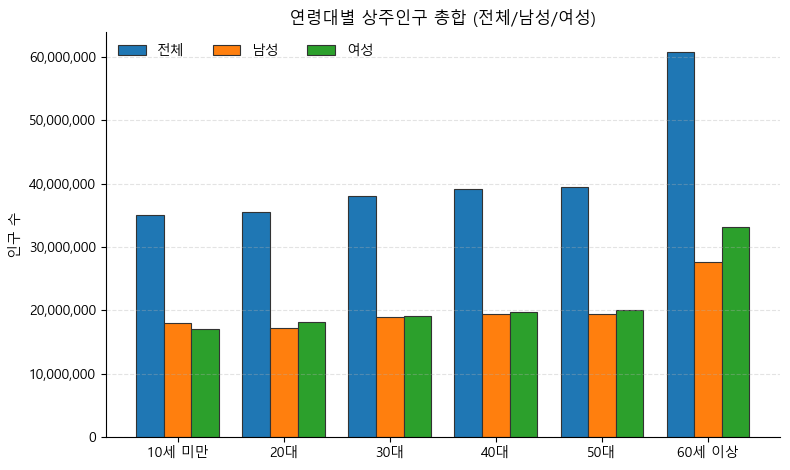

In [ ]:
from matplotlib.ticker import FuncFormatter

# 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows 기본 한글 폰트
plt.rcParams['axes.unicode_minus'] = False     # 마이너스 깨짐 방지

# 한글 폰트 (Windows 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 컬럼 리스트 (순서 맞춤)
overall_cols = [
    "연령대_10_미만_상주인구_수","연령대_20_상주인구_수","연령대_30_상주인구_수",
    "연령대_40_상주인구_수","연령대_50_상주인구_수","연령대_60_이상_상주인구_수",
]
male_cols = [
    "남성연령대_10_상주인구_수","남성연령대_20_상주인구_수","남성연령대_30_상주인구_수",
    "남성연령대_40_상주인구_수","남성연령대_50_상주인구_수","남성연령대_60_이상_상주인구_수",
]
female_cols = [
    "여성연령대_10_상주인구_수","여성연령대_20_상주인구_수","여성연령대_30_상주인구_수",
    "여성연령대_40_상주인구_수","여성연령대_50_상주인구_수","여성연령대_60_이상_상주인구_수",
]

age_labels = ["10세 미만","20대","30대","40대","50대","60세 이상"]

# 합계 계산
overall = df[overall_cols].sum().values
male    = df[male_cols].sum().values
female  = df[female_cols].sum().values

# 그룹드 바 포지션
x = np.arange(len(age_labels))
width = 0.26

fig, ax = plt.subplots(figsize=(8, 4.8))
ax.bar(x - width, overall, width, label="전체",  edgecolor="#333333", linewidth=0.8)
ax.bar(x,         male,    width, label="남성",  edgecolor="#333333", linewidth=0.8)
ax.bar(x + width, female,  width, label="여성",  edgecolor="#333333", linewidth=0.8)

ax.set_title("연령대별 상주인구 총합 (전체/남성/여성)")
ax.set_xticks(x, age_labels)
ax.set_ylabel("인구 수")
ax.yaxis.set_major_formatter(FuncFormatter(lambda v, pos: f"{int(v):,}"))

ax.grid(axis="y", linestyle="--", alpha=0.35)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# 범례만 좌측 상단
ax.legend(ncol=3, frameon=False, loc="upper left")

plt.tight_layout()
plt.show()

In [ ]:
# 불필요한 컬럼 제거한 데이터 저장
df.sort_values('기준_년분기_코드', inplace=True)
df.to_csv("resident_population.csv", index=False, encoding="utf-8-sig")